<a href="https://colab.research.google.com/github/sejin-sim/Hands_On_ML/blob/master/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D_Chapter8_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C(dimensionality_reduction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 차원의 저주(curse of dimensionality) : 훈련 샘플이 수백만 개의 특성을 갖고 있기 때문에 훈련을 느리게 하고 좋은 솔루션을 찾기 어렵게 만드는 현상.

- 차원 축소는 데이터 시각화에도 유용하다. 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 많다.

<br/>

## 1. 차원의 저주(Curse of Dimensionality)

1. 차원의 저주 : 차원이 증가함에 따라 빈 공간이 많이 생기기 때문에, 차원이 커질수록 학습이 어려워지고 더 많은 데이터를 필요로 하는 현상을 말한다.

2. 간단하게 말하면 차원이 증가함에 따라(변수의 수가 증가할수록) 모델의 성능이 안 좋아지는 현상이다.
 - "관측치 수 < 변수의 수"일 때 발생하는 현상

<br/>

## 2. 차원 축소를 위한 접근 방법

### 1) 투영(Projection)
1. 모든 훈련 샘플이 고차원 공간 안의 저차원 부분공간(subspace)에 놓여있다.

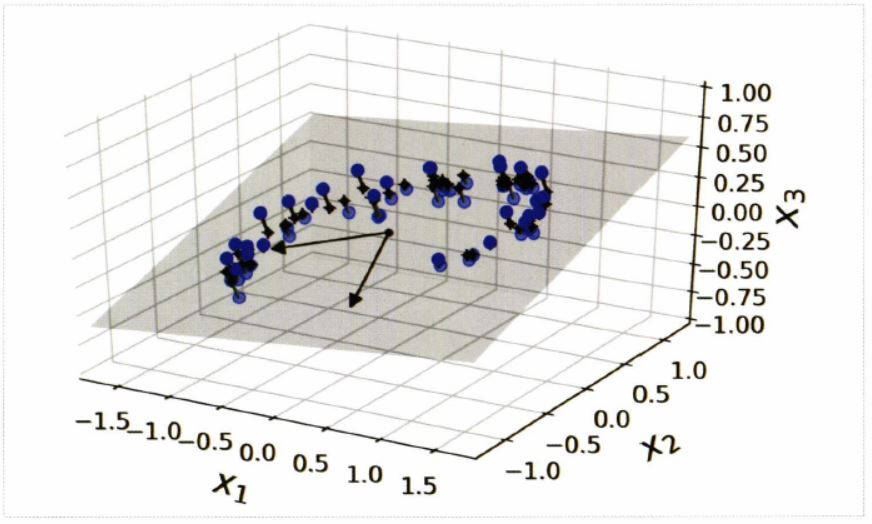

- 모든 훈련 샘플이 거의 평면의 형태로 놓여있다. = 고차원(3D) 공간에 있는 저차원(2D) 부분 공간

- 저차원 부분 공간에 수직으로 (샘플과 평면 사이의 가장 짧은 대각선을 따라) 투영하면 다음과 같은 2D 데이터 셋을 얻는다.

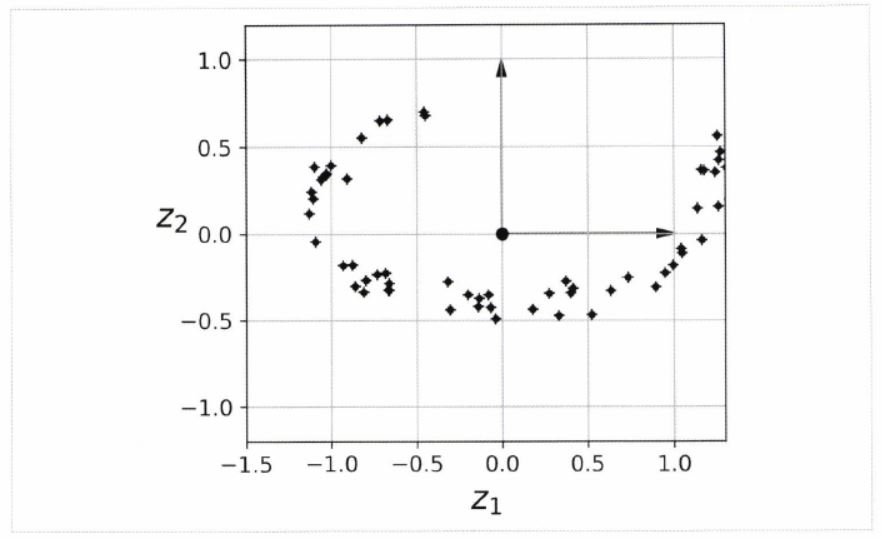

- 데이터 차원을 3D에서 2D로 줄었으며, 각 축은 새로운 특성 $z_1, z_2$에 대응 된다.

- 투영은 고차원을 저차원으로 만들어 줄 수 있으나, 아래와 같은 '스위스 롤' 형태는 공간이 뒤틀려 있어서, 투영을 통한 축소는 좋지 못한 결과이다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc6kpeS%2FbtqF6EqdimO%2FFzoaNxg5olAE4l9yfWhF6k%2Fimg.jpg" width=50%>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FR3V1F%2FbtqF7t2O77d%2FA3XyJE6LkX5xb3KIiCvEG0%2Fimg.jpg">

### 2) 매니폴드 학습
1. 스위스 롤은 2차원 매니폴드의 한 예로, 2차원 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D 모양이다.

2. d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원의 일부이다.
 - 스위스 롤은 국부적으로 2D(d)차원으로 보이지만, 3D(n)차원으로 말려 있다.

3. 대다수의 차원 축소 알고리즘은 매니폴드 학습(매니폴드를 모델링)방식을 사용한다.
 - "매니폴드 가정(가설)" : 대부분 실제 고차원 데이터 셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 가정
 - 매니폴드 가정과 병행되는 다른 가정 : 처리해야 할 작업(ex. 분류 또는 회귀 문제)이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이라는 가정

4. 모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면, 훈련 속도는 빨라지지만 항상 더 나은 솔루션을 제공해주지는 않는다는 것. (데이터 셋에 따라 다르다.)

<br/>

## 3. PCA

- 주성분 분석(Pricipal Component Analysis) : 데이터에 가장 가까운 초평면(hyperplane)을 정의한 다음, 데이터를 이 평면에 투영시키는 기법

### 1) 분산 보존
1. 저차원의 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다.
 - 분산이 최대로 보존되는 축을 선택하면 된다.= 정보 손실이 가장 적게 발생

 - 원본 데이터 셋과 투영된 데이터 셋 사이의 평균 제곱 거리를 최소화 하는 축을 선택. 





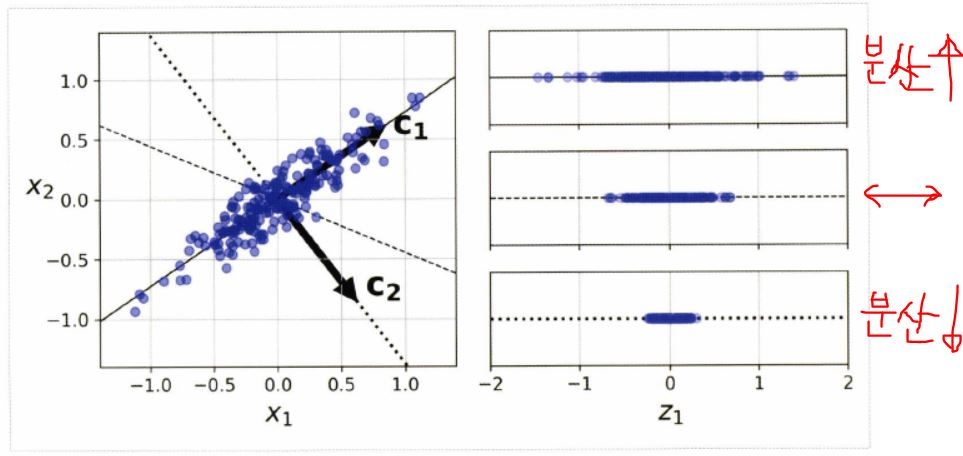

- c1에 투영된 것은 분산을 최대로 보존, c2인 점선에 투영된 것은 분산을 매우 적게 유지

<br/>

### 2) 주성분

1. PCA는 훈련세트에서 분산이 최대인 축을 찾고 이후 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두번 째 축을 찾는다.
> 고차원 데이터셋일 땐 두축에 직교하는 세번째 축을 찾고 이는 n번째 까지 늘어난다.

2. $i$번째 축을 이 데이터의 $i$번째 주 성분(PC=principal component)이라고 부른다.

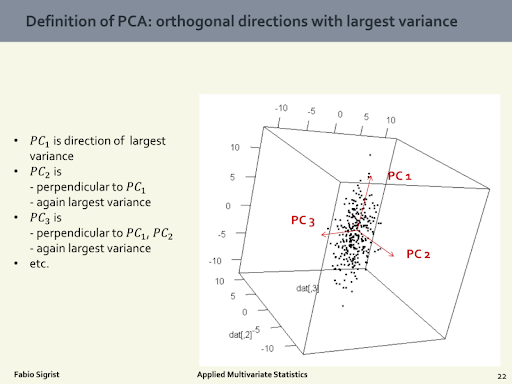

3. 특잇값 분해(SVD = Singular Value Decomposition) : 훈련 세트에서 주성분을 찾는 방법으로, 표준 행렬 분해 기술이다.

4.  훈련 세트 행렬 $X$를 세 개 행렬의 행렬 곱셈인 $U \sum V^T$ 로 분해할 수 있다.($V$가 주성분)
 - $X  = $ m(샘플 갯수)  x n(특성 개수) 행렬 $ = U \sum V^T $
 - U : $AA^T$를 고유값 분해해서 얻어진 m x m 직교행렬
 - V : $A^{T}A$를 고유값 분해해서 얻어진 n x n 직교행렬
 - $\sum$ : $AA^{T} A^{T}A$를 고유값 분해해서 나오는 고유값들의 루트를 대각원소로 하는 m x n 직사각 대각 행렬로 그 대각 원소들을 A의 특이값이라 불는다.

* 사이킷런의 PCA 모델은 자동으로 데이터를 중앙에 맞춰준다.

In [1]:
import numpy as np
import os

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (12,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
# 3D 데이터셋

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
# SVD 

X_centered = X - X.mean(axis=0) # 60 x 3
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0] # 1번째 PC
c2 = Vt.T[:, 1] # 2번째 PC

## 3) d차원으로 투영하기
1. 주성분을 추출했다면, 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소 시킬 수 있다.

2. 훈련 세트를 d차원으로 투영하기   
 $X_{d-proj} = XW_{d}$
 - $X_{d-proj}$ = 축소된 데이터 셋
 - $W_{d}$ = 행렬 $X$와 $V$의 첫 d열로 구성된 행렬

3. ex) $X =$ (60, 3)이고 2차원 축소를 원함  
 $X_{d-proj} = XW_{d}=$ (60, 3) (3, 2)
 - $W_{d}$ 의 주 성분 = 입력 행렬 $X$의 차원 =3

In [4]:
W2 = Vt.T[:, :2]         # 3 x 2 = 3차원(특성)에서 2개 주 성분
X2D = X_centered.dot(W2) 

X2D.shape

(60, 2)

In [5]:
Vt

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

### 4) 사이킷런 사용하기

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # n_components : 주성분 갯수 = 축소할 차원
X2D = pca.fit_transform(X)  # (60, 3)에서 2개의 주성분으로 축소
X2D.shape

(60, 2)

### 5) 설명된 분산의 비율
1. explained_variance_ratio_ 변수 = 주성분의 설명된 분산의 비율

2. 각 주성분의 축을 따라 잇는 데이터셋의 분산 비율

In [7]:
pca.explained_variance_ratio_ 

array([0.84248607, 0.14631839])

- 데이터의 84.2%는 첫 번째 PC를 따랐고, 14.6% 가 두 번째 PC를 따라 놓였다. 
> 2개 주성분으로 전체 분산의 98%를 설명 가능

- 주로 이 비율을 확인해서 주성분의 개수(즉, 적절한 차원 수)를 결정한다.

<br/>

### 6) 적절한 차원 수 선택하기
1. 축소할 차원 수를 임의로 정하기 보다 충분한 분산(ex. 95%) 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다.
2. 물론 시각화를 위해 2~3개로 줄이는 것이 일반적이다.

In [8]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 
# cumsum >= 0.95 = array([False,  True,  True])
# argmax = 최대값의 색인 위치
# np.argmax(cumsum >= 0.95) = 1
d

2

In [9]:
pca = PCA(n_components=0.95) # 95% 이상인 분산으로 차원 축소
X_reduced = pca.fit_transform(X)
X_reduced.shape # (60, 3) →(60, 2)

(60, 2)

### 7) 압축을 위한 PCA
1. 차원 축소를 하면 훈련 세트의 크기가 줄어들어, 분류 알고리즘(ex. SVM)의 속도를 크게 높일 수 있다.

2. 반대로 압축된 데이터 셋에 PCA 투영 반환을 적용시켜, 원본 데이터와 유사하게 만들 수 있다.

3. 재구성 오차(reconstruction error) : 원본 데이터와 재구성된 데이터(압축 후 원복한 것) 사이의 평균 제곱 거리

4. PCA 역변환 공식
> $X_{recovered} = X_{d-proj}W^{T}_{d}$


MNIST 예제를 통해 역변환을 해보자

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
X_train.shape

(52500, 784)

In [12]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)         # 154로 압축
X_recovered = pca.inverse_transform(X_reduced) # 784로 복원
X_train.shape

(52500, 784)

In [13]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

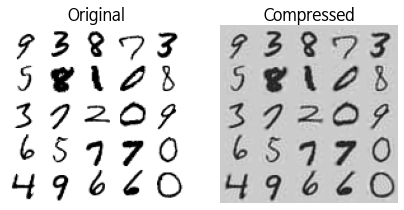

In [14]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

- 오른쪽 그림은 샘플을 압축한 후 복원한 결과이다. 이미지 품질이 조금 손실되었지만, 숫자 모양은 온전하다.

### 8) 랜덤 PCA

1. 기본값(default 값)이 "auto"인 svd_solver 매개변수를 "randomized"로 지정하면, 사이킷런은 랜덤 PCA라는 확률적 알고리즘을 사용한다.
2. 랜덤 PCA를 사용하면, 처음 d개의 주성분에 대한 근사값을 빠르게 찾을 수 있다.

In [15]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### 9) 점진적 PCA (IPCA)

- PCA를 구현할 때의 문제점 = SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다. → 이를 해결하기 위해 나온 알고리즘이 IPCA

1. 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한번에 하나씩 주입

2. 훈련 세트가 클 때 유용하고, 온라인(=실시간)으로 PCA 적용 가능


In [16]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100 
# 100개의 미니배치로 나누고 차원을 154개로 줄인다.

inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [17]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [18]:
# 또 다른 방법
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

## 4. 커널 PCA
- 커널 트릭 : 샘플을 고차원 공간 특성 공간 featrue space)으로 암묵적 맵핑하여 SVM의 비선형 분류와 회귀를 가능하게 하는 수학적 기법

1. 커널 PCA(kPCA) : 커널 기법을 PCA에 적용해 차원 축소를 위한 복잡한 비선형 투영을 수행

2. kPCA 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용하다.

사이킷런의 KernelPCA를 사용하여 kernel 매개변수를 통해 사용할 커널을 지정해 줄 수 있다.


In [20]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [21]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

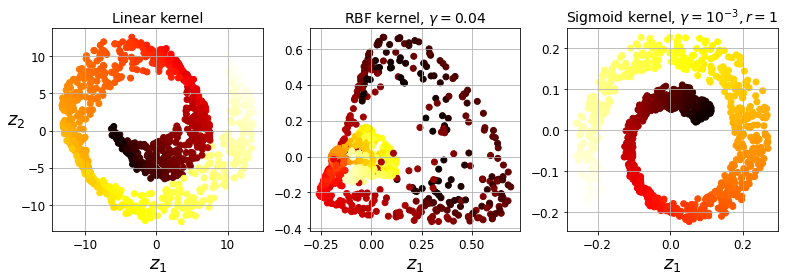

### 1) 커널 선택과 하이퍼파라미터 튜닝

1. kPCA는 비지도 학습으로 좋은 커널과 하이퍼 파라미터를 선택하기 위한 명확한 기준 無

2. 차원 축소는 종종 지도 학습의 전처리 단계에서 활용되기에, 그리드 탐색을 통해 성능이 뛰어난 커널과 하이퍼 파라미터를 선택할 수 있다.

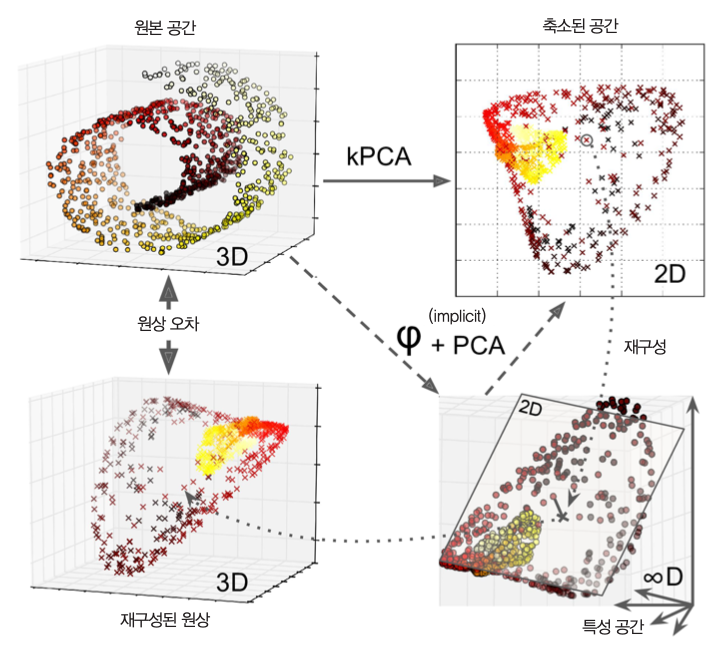

In [27]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),            # 2차원으로 축소
        ("log_reg", LogisticRegression(solver="lbfgs")) # 분류를 위해 로지스틱 회귀 적용
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]  

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [29]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [31]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [34]:
from sklearn.metrics import mean_squared_error
print("재구성 원상 오차 :", mean_squared_error(X, X_preimage))

재구성 원상 오차 : 32.78630879576614


- 재구성 원상 : 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾는 것
> 원상을 얻게 되면 원본 샘플과의 제곱 거리를 측정 할 수 있다.

## 5. LLE

1. 지역 선형 임베딩(LLE: Locally Linear Embedding) : 강력한 비선형 차원 축소 기법이며, 투영(projection)에 의존하지 않는 매니폴드 학습.

2. 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정하고 국부적인 관계가 잘 보존되는 훈련 세트의 저 차원 표현을 찾는다. 

> 단점 :  대용량 데이터 셋에 적용하기는 어렵다.

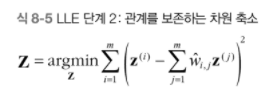


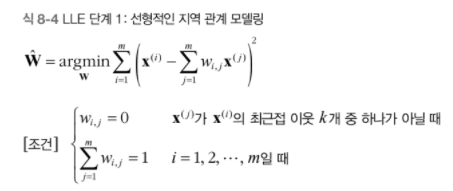


In [35]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

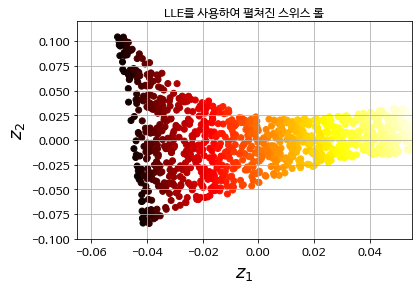

In [37]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.title("LLE를 사용하여 펼쳐진 스위스 롤")
plt.show()

- 스위스 롤이 완전히 펼쳐졌고, 지역적으로는 샘플 간 거리가 잘 보존되어 있다.

<br/>

## 6. 다른 차원 축소 기법

1. 랜덤 투영
 - 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영한다.
 - 사이킷런의 random_projection 패키지를 사용하면 된다.

2. 다차원 스케일링(MDS; Multidimensional Scaling)
 - 샘플 간의 거리를 보존하면서 차원을 축소한다.

3. Isomap
 - 먼저 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다.
 - 그 다음, 샘플 간의 지오데식 거리(geodesic distance)를 유지하면서 차원을 축소한다.

4. t-SNE(t-distributed stochastic neighbor embedding)
 - 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소한다.
 - 주로 시각화에 많이 사용된다. (특히 고차원 공간에 있는 샘플의 군집을 시각화할 때)

5. 선형 판별 분석(LDA; Linear Discriminant Analysis)
 - 분류 알고리즘임에도 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습한다.
 - 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있다.
 - 투영을 통해 가능한 한 클래스가 멀리 떨어지게 유지시키므로, 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 좋다.
 